In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from functools import partial

In [4]:
from dotenv import load_dotenv

from pathlib import Path

env_path = Path("../../.env-live")
# env_path = Path("../../.env-live-g1")
# env_path = Path("../../.env-live-g2")
# env_path = Path("../../.env-live-g3")
# env_path = Path("../../.env-live-g4")
# env_path = Path("../../.env-live-g5")
# env_path = Path("../../.env-live-g6")


if env_path.exists():
    load_dotenv(dotenv_path=env_path)

In [5]:
import os
os.environ['JRJ_MODEL_REGISTRY_S3_BUCKET_NAME']

'jasonjafariml'

In [6]:
from jrjModelRegistry import handleDashboard, jrjRouterModelRegistry
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel

Pinged your deployment. You successfully connected to MongoDB!


In [7]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [8]:
# Download Dataset from https://www.dropbox.com/scl/fo/v71bqw2zowgla028cwdh0/AEfemP4C8qQ2X5tTNXMCqUQ/Session%203?dl=0&preview=educationWage.xlsx&rlkey=rlkgo6o58ex2kjbiv4b7cr9nj&subfolder_nav_tracking=1
# and add it to colab

In [9]:
educationWageDf = pd.read_excel("./educationWage.xlsx")

In [10]:
educationWageDf

,Education,Wage
0,20,160
1,18,120
2,12,70
3,16,100
4,10,65
5,23,160
6,2,40
7,5,55


In [11]:
type(educationWageDf)

pandas.core.frame.DataFrame

In [12]:
educationWageDf["Education"], type(educationWageDf["Education"])

(0    20
 1    18
 2    12
 3    16
 4    10
 5    23
 6     2
 7     5
 Name: Education, dtype: int64,
 pandas.core.series.Series)

<Axes: xlabel='Education', ylabel='Wage'>

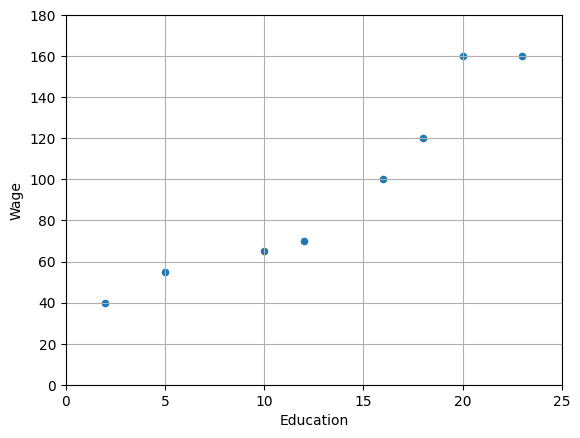

In [13]:
educationWageDf.plot.scatter(
    x = 'Education',
    y = 'Wage',
    xlim = (0, 25),
    ylim = (0, 180),
    grid = True
)


In [14]:
educationWageDf["Education"], type(educationWageDf["Education"])

(0    20
 1    18
 2    12
 3    16
 4    10
 5    23
 6     2
 7     5
 Name: Education, dtype: int64,
 pandas.core.series.Series)

In [15]:
sm.add_constant(educationWageDf["Education"]), type(sm.add_constant(educationWageDf["Education"]))

(   const  Education
 0    1.0         20
 1    1.0         18
 2    1.0         12
 3    1.0         16
 4    1.0         10
 5    1.0         23
 6    1.0          2
 7    1.0          5,
 pandas.core.frame.DataFrame)

In [16]:
sm.add_constant(educationWageDf["Education"])

,const,Education
0,1.0,20
1,1.0,18
2,1.0,12
3,1.0,16
4,1.0,10
5,1.0,23
6,1.0,2
7,1.0,5


In [17]:
educationWageLiniarRgressionModel = sm.OLS(
  educationWageDf["Wage"],
  sm.add_constant(educationWageDf["Education"])
)


In [18]:
educationWageLiniarRgressionModelFit = educationWageLiniarRgressionModel.fit()

In [19]:
print(educationWageLiniarRgressionModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     57.64
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           0.000272
Time:                        00:52:49   Log-Likelihood:                -32.114
No. Observations:                   8   AIC:                             68.23
Df Residuals:                       6   BIC:                             68.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1358     11.887      1.357      0.2

In [20]:
educationWageLiniarRgressionModelFit.params

const        16.135762
Education     6.046358
dtype: float64

In [21]:
# wage = b0 + b1 * Education

In [22]:
predictedWage = educationWageLiniarRgressionModelFit.predict(sm.add_constant(educationWageDf["Education"]))
predictedWage

0    137.062914
1    124.970199
2     88.692053
3    112.877483
4     76.599338
5    155.201987
6     28.228477
7     46.367550
dtype: float64

In [23]:
educationWageLiniarRgressionModelSampleData = {
    "Education": [20, 25]
}

In [24]:
def educationWageLiniarRgressionModelTransformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    dfTransformer = pd.DataFrame(dataForTransfer)
    dfTransformer = sm.add_constant(dfTransformer[['Education']])
    return dfTransformer

In [25]:
educationWageLiniarRgressionModelSampleTransformed = educationWageLiniarRgressionModelTransformer(educationWageLiniarRgressionModelSampleData)
educationWageLiniarRgressionModelSampleTransformed

,const,Education
0,1.0,20
1,1.0,25


In [26]:
educationWageLiniarRgressionModelFit.predict(educationWageLiniarRgressionModelSampleTransformed)

0    137.062914
1    167.294702
dtype: float64

In [27]:
def educationWageLiniarRgressionModelMainPredictor(self, transformedData):
    return self.predict(transformedData)
educationWageLiniarRgressionModelFit.mainPredictor = partial(educationWageLiniarRgressionModelMainPredictor, educationWageLiniarRgressionModelFit)
educationWageLiniarRgressionModelFit.transformer = educationWageLiniarRgressionModelTransformer

In [28]:
test1 = educationWageLiniarRgressionModelFit.transformer(educationWageLiniarRgressionModelSampleData)
test1

,const,Education
0,1.0,20
1,1.0,25


In [29]:
educationWageLiniarRgressionModelFit.mainPredictor(test1)

0    137.062914
1    167.294702
dtype: float64

In [30]:
educationWageLiniarRgressionModelMetadata = {
    "modelName":f"educationWageLiniarRgression",
    "version":"1.0.1",
    "params": educationWageLiniarRgressionModelFit.params.to_dict(),
    "score": float(educationWageLiniarRgressionModelFit.rsquared),
    "modelLibraray": 'sm.OLS',
    "libraryMetadata": {
        "pvalues": educationWageLiniarRgressionModelFit.pvalues.to_dict(),
        "r_squared": float(educationWageLiniarRgressionModelFit.rsquared),
        "adj_r_squared": float(educationWageLiniarRgressionModelFit.rsquared_adj)
    },

    "sampleData": {
        "dataForTransfer": educationWageLiniarRgressionModelSampleData
    }
}
educationWageLiniarRgressionModelMetadata

{'modelName': 'educationWageLiniarRgression',
 'version': '1.0.1',
 'params': {'const': 16.135761589403973, 'Education': 6.046357615894037},
 'score': 0.9057136182627168,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 0.22346398484962393,
   'Education': 0.00027175932236506796},
  'r_squared': 0.9057136182627168,
  'adj_r_squared': 0.8899992213065029},
 'sampleData': {'dataForTransfer': {'Education': [20, 25]}}}

In [31]:
registerAJrjModel(educationWageLiniarRgressionModelFit, educationWageLiniarRgressionModelMetadata)

✅ Uploaded encrypted ZIP to s3://jasonjafariml/educationWageLiniarRgression__1.0.1.pkl.zip
❌ Failed to generate URL or upload: E11000 duplicate key error collection: jrjModelRegistry.models index: modelName_1_version_1 dup key: { modelName: "educationWageLiniarRgression", version: "1.0.1" }, full error: {'index': 0, 'code': 11000, 'errmsg': 'E11000 duplicate key error collection: jrjModelRegistry.models index: modelName_1_version_1 dup key: { modelName: "educationWageLiniarRgression", version: "1.0.1" }', 'keyPattern': {'modelName': 1, 'version': 1}, 'keyValue': {'modelName': 'educationWageLiniarRgression', 'version': '1.0.1'}}


In [32]:
educationWageDf['predictedWage'] = predictedWage
educationWageDf

,Education,Wage,predictedWage
0,20,160,137.062914
1,18,120,124.970199
2,12,70,88.692053
3,16,100,112.877483
4,10,65,76.599338
5,23,160,155.201987
6,2,40,28.228477
7,5,55,46.367550


In [33]:
testPredict = educationWageLiniarRgressionModelFit.predict([[1,15]])
testPredict

array([106.83112583])

In [34]:
import matplotlib.pyplot as plt


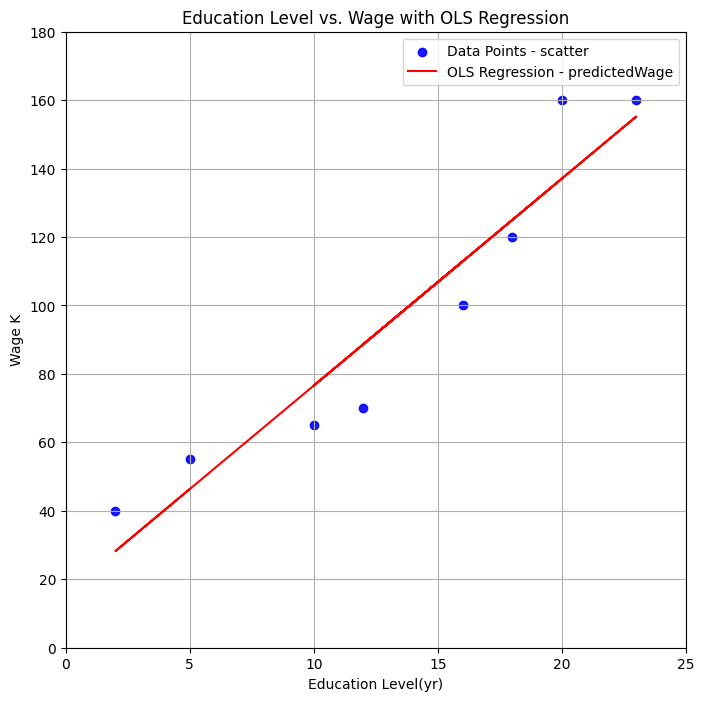

In [35]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  educationWageDf["Education"],
  educationWageDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  educationWageDf["Education"],
  educationWageDf["predictedWage"],
  color='red',
  label='OLS Regression - predictedWage'
)
plt.title('Education Level vs. Wage with OLS Regression')
plt.xlabel('Education Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)

plt.gca().set_xlim([0, 25])
plt.gca().set_ylim([0, 180])


plt.show()

# Another way

In [36]:
X = np.array([20, 18, 12, 16, 10, 23, 2, 5,])
y = np.array([160, 120, 70 , 100, 65, 160, 40, 55])
X, y

(array([20, 18, 12, 16, 10, 23,  2,  5]),
 array([160, 120,  70, 100,  65, 160,  40,  55]))

In [37]:
X = sm.add_constant(X)

In [38]:
X

array([[ 1., 20.],
       [ 1., 18.],
       [ 1., 12.],
       [ 1., 16.],
       [ 1., 10.],
       [ 1., 23.],
       [ 1.,  2.],
       [ 1.,  5.]])

In [39]:
model = sm.OLS(y, X).fit()


In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     57.64
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           0.000272
Time:                        00:53:59   Log-Likelihood:                -32.114
No. Observations:                   8   AIC:                             68.23
Df Residuals:                       6   BIC:                             68.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1358     11.887      1.357      0.2

/Users/jason/.jjDataDir/~~asdf_SARAVA/installs/python/3.13.3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [41]:
print("Coefficients:", model.params)

Coefficients: [16.13576159  6.04635762]


In [42]:
predictions = model.predict([[1, 5], [1, 15]])
predictions

array([ 46.36754967, 106.83112583])

In [43]:
def predicWage(intercept, slope, yearsOfExperience):
  return intercept + (slope * yearsOfExperience)

In [44]:
predicWage(model.params[0], model.params[1], 5)

np.float64(46.36754966887416)

In [45]:
predicWage(model.params[0], model.params[1], 15)

np.float64(106.83112582781452)

# Another way

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
educationWageDf

,Education,Wage,predictedWage
0,20,160,137.062914
1,18,120,124.970199
2,12,70,88.692053
3,16,100,112.877483
4,10,65,76.599338
5,23,160,155.201987
6,2,40,28.228477
7,5,55,46.367550


In [48]:
educationWageLiniarRgressionModel2 = LinearRegression()

In [49]:
educationWageDf["Education"], type(educationWageDf["Education"])

(0    20
 1    18
 2    12
 3    16
 4    10
 5    23
 6     2
 7     5
 Name: Education, dtype: int64,
 pandas.core.series.Series)

In [50]:
educationWageDf[["Education"]], type(educationWageDf[["Education"]])

(   Education
 0         20
 1         18
 2         12
 3         16
 4         10
 5         23
 6          2
 7          5,
 pandas.core.frame.DataFrame)

In [51]:
educationWageLiniarRgressionModel2Fit = educationWageLiniarRgressionModel2.fit(
    educationWageDf[["Education"]],
    educationWageDf["Wage"]
)

In [52]:
# Print the intercept and coefficient
print("Intercept:", educationWageLiniarRgressionModel2Fit.intercept_)
print("Coefficient:", educationWageLiniarRgressionModel2Fit.coef_[0])

Intercept: 16.13576158940394
Coefficient: 6.046357615894042


In [53]:
predictions1 = educationWageLiniarRgressionModel2Fit.predict(np.array([[5], [15]]))
predictions1

/Users/jason/.jjDataDir/~~asdf_SARAVA/installs/python/3.13.3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 46.36754967, 106.83112583])

In [54]:
predicWage(educationWageLiniarRgressionModel2Fit.intercept_, educationWageLiniarRgressionModel2Fit.coef_[0], 5)

np.float64(46.36754966887415)

In [55]:
predicWage(educationWageLiniarRgressionModel2Fit.intercept_, educationWageLiniarRgressionModel2Fit.coef_[0], 15)

np.float64(106.83112582781457)

In [56]:
predictedWage2 = educationWageLiniarRgressionModel2Fit.predict(educationWageDf[["Education"]])
educationWageDf['predictedWage2'] = predictedWage2
educationWageDf

,Education,Wage,predictedWage,predictedWage2
0,20,160,137.062914,137.062914
1,18,120,124.970199,124.970199
2,12,70,88.692053,88.692053
3,16,100,112.877483,112.877483
4,10,65,76.599338,76.599338
5,23,160,155.201987,155.201987
6,2,40,28.228477,28.228477
7,5,55,46.367550,46.367550


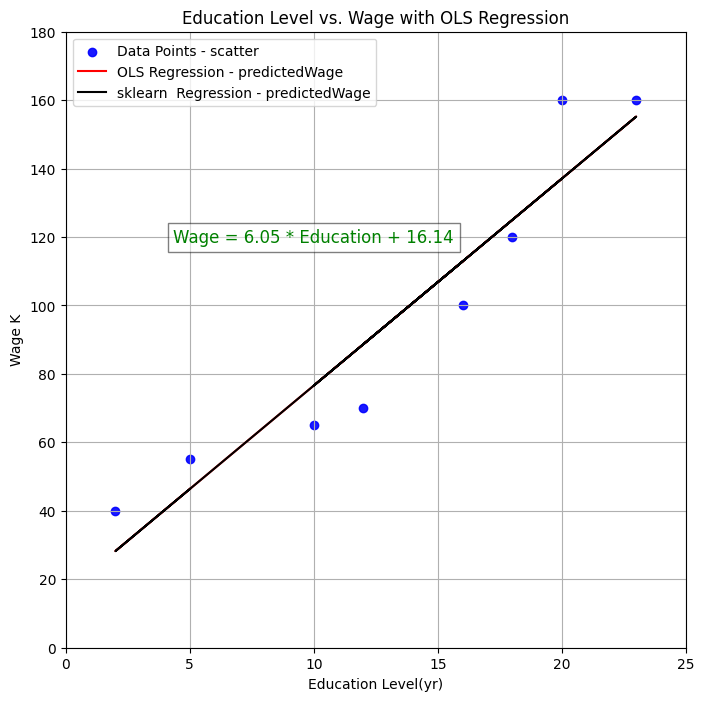

In [57]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  educationWageDf["Education"],
  educationWageDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  educationWageDf["Education"],
  educationWageDf["predictedWage"],
  color='red',
  label='OLS Regression - predictedWage'
)
plt.plot(
  educationWageDf["Education"],
  educationWageDf["predictedWage2"],
  color='black',
  label='sklearn  Regression - predictedWage'
)
plt.title('Education Level vs. Wage with OLS Regression')
plt.xlabel('Education Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)

plt.gca().set_xlim([0, 25])
plt.gca().set_ylim([0, 180])


equation = f'Wage = {educationWageLiniarRgressionModel2Fit.coef_[0]:.2f} * Education + {educationWageLiniarRgressionModel2Fit.intercept_:.2f}'


plt.text(
    10, 120,
    equation,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=12,
    color="green",
    bbox=dict(facecolor='white', alpha=0.5)
)



plt.show()

In [58]:
def educationWageLiniarRgressionModel2Transformer(dataForTransfer = None):
    import pandas as pd
    dfTransformer = pd.DataFrame(dataForTransfer)
    return dfTransformer

In [59]:
educationWageLiniarRgressionModel2SampleTransformed = educationWageLiniarRgressionModel2Transformer(educationWageLiniarRgressionModelSampleData)
educationWageLiniarRgressionModel2SampleTransformed

,Education
0,20
1,25


In [60]:
educationWageLiniarRgressionModel2Fit.predict(educationWageLiniarRgressionModel2SampleTransformed)

array([137.06291391, 167.29470199])

In [61]:
def educationWageLiniarRgressionModel2MainPredictor(self, transformedData):
    npArr =  self.predict(transformedData)
    # return npArr
    result = {f"{i}": float(v) for i, v in enumerate(npArr)}
    return result
educationWageLiniarRgressionModel2Fit.mainPredictor = partial(educationWageLiniarRgressionModel2MainPredictor, educationWageLiniarRgressionModel2Fit)
educationWageLiniarRgressionModel2Fit.transformer = educationWageLiniarRgressionModel2Transformer

In [62]:
test2 = educationWageLiniarRgressionModel2Fit.transformer(educationWageLiniarRgressionModelSampleData)
test2

,Education
0,20
1,25


In [63]:
educationWageLiniarRgressionModel2Fit.mainPredictor(test2)

{'0': 137.06291390728478, '1': 167.294701986755}

In [64]:
educationWageLiniarRgressionModel2Metadata = {
    "modelName":f"educationWageLiniarRgression2",
    "version":"1.0.1",
    "params": {
        "intercept": float(educationWageLiniarRgressionModel2Fit.intercept_),
        **{f"coef_{i}": float(coef) for i, coef in enumerate(educationWageLiniarRgressionModel2Fit.coef_)}
    },
    "score":  educationWageLiniarRgressionModel2Fit.score(
        educationWageDf[["Education"]],
        educationWageDf["Wage"]
    ),
    "modelLibraray": 'sklearn.LinearRegression',
    "libraryMetadata": {
        "params": educationWageLiniarRgressionModel2Fit.get_params(),
        "r2_score":  educationWageLiniarRgressionModel2Fit.score(
            educationWageDf[["Education"]],
            educationWageDf["Wage"]
        )
    },
    "sampleData": {
        "dataForTransfer": educationWageLiniarRgressionModelSampleData
    }
}
educationWageLiniarRgressionModel2Metadata

{'modelName': 'educationWageLiniarRgression2',
 'version': '1.0.1',
 'params': {'intercept': 16.13576158940394, 'coef_0': 6.046357615894042},
 'score': 0.9057136182627167,
 'modelLibraray': 'sklearn.LinearRegression',
 'libraryMetadata': {'params': {'copy_X': True,
   'fit_intercept': True,
   'n_jobs': None,
   'positive': False},
  'r2_score': 0.9057136182627167},
 'sampleData': {'dataForTransfer': {'Education': [20, 25]}}}

In [65]:
registerAJrjModel(educationWageLiniarRgressionModel2Fit, educationWageLiniarRgressionModel2Metadata)

✅ Uploaded encrypted ZIP to s3://273-g6/educationWageLiniarRgression2__1.0.1.pkl.zip


{'_id': '683fcab5023766bca2145018',
 'modelName': 'educationWageLiniarRgression2',
 'version': '1.0.1',
 'params': {'intercept': 16.13576158940394, 'coef_0': 6.046357615894042},
 'score': 0.9057136182627167,
 'modelLibraray': 'sklearn.LinearRegression',
 'libraryMetadata': {'params': {'copy_X': True,
   'fit_intercept': True,
   'n_jobs': None,
   'positive': False},
  'r2_score': 0.9057136182627167},
 'sampleData': {'dataForTransfer': {'Education': [20, 25]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 1590,
 'zippedModelSizeBytes': 1257,
 's3Url': '273-g6/educationWageLiniarRgression2__1.0.1.pkl.zip',
 'createdAt': '2025-06-04T04:25:25.230Z',
 'updatedAt': '2025-06-04T04:25:25.230Z'}